### Imports ###

In [1]:
import os
import matplotlib.pyplot as plt
from skimage import color, filters, img_as_float, img_as_ubyte
from skimage.feature import blob_dog
import matplotlib.pyplot as plt

import sys
from PIL import Image

#### Read image paths to store them ####

In [2]:
images = []

In [3]:
def read_images_path(path, images_list):
    for x in os.listdir(path):
        path2 = os.path.join(path, x)
        if os.path.isdir(path2):
            read_images_path(path2, images_list)
        elif os.path.isfile(path2):
            images.append(path2)

In [4]:
os.getcwd()

'/Users/pati/Documents/Thesis/thesis/code'

In [5]:
read_images_path('../src/img2', images)

In [6]:
import matplotlib.pyplot as plt

In [7]:
img = Image.open(images[0])

In [8]:
images[0]

'../src/img2/Marled_Knit_Racerback_Tank/img_00000002.jpg'

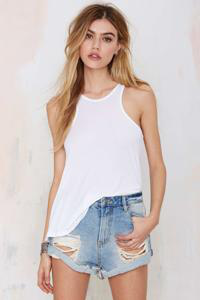

In [9]:
img

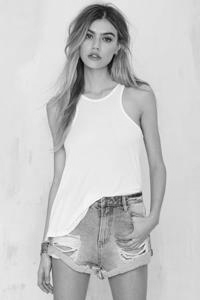

In [10]:
img_gray = Image.open(images[0]).convert('LA')
img_gray

In [11]:
def transform_dog(image_path, sigma):
    img = plt.imread(image_path)
    img = img_as_float(img)
    img_gray = color.rgb2gray(img)
    
    k = 1.8
    s1 = filters.gaussian(img_gray ,k*sigma)
    s2 = filters.gaussian(img_gray ,sigma)
    dog = (s1 - s2)
    dog = 255 - img_as_ubyte(dog)
    
    path2 = image_path[:-4] + '_dog.jpg'
    plt.imsave(path2, dog, cmap='gray')
    
    path3 = image_path[:-4] + '_combine.jpg'
    combine_pictures(image_path, path2, path3)

In [15]:
def combine_pictures(path_original, path_dog, dest_path):
    img = Image.open(path_original)
    img2 = Image.open(path_dog)
    images = [img, img2]
    widths, heights = zip(*(i.size for i in images))
    
    total_width = sum(widths)
    max_height = max(heights)
    
    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset,0))
        x_offset += im.size[0]
    
    new_im.save(dest_path)

In [16]:
image = transform_dog('../src/img2/2-in-1_Space_Dye_Athletic_Tank/img_00000001.jpg', 0.8)

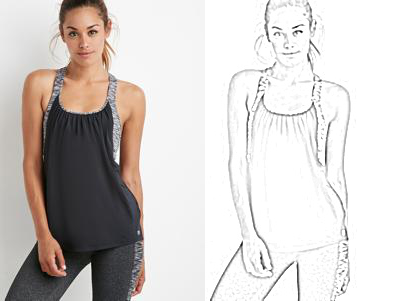

In [17]:
image